# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


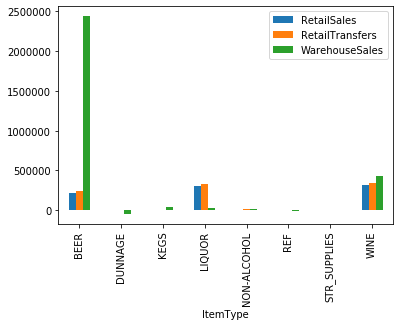

In [22]:

#Method 1

data[['RetailSales','RetailTransfers','WarehouseSales','ItemType']].groupby('ItemType').agg('sum').plot.bar()



## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

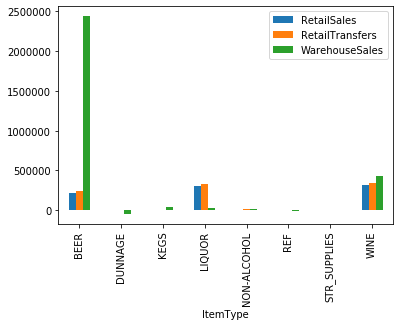

In [3]:
#Method 2 
data.groupby('ItemType')['RetailSales','RetailTransfers','WarehouseSales','ItemType'].agg('sum').plot(kind='bar')

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

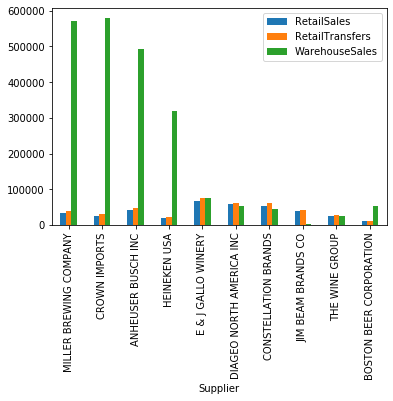

In [20]:
#find the top 10 suppliers
data['Total']=data.RetailSales+data.RetailTransfers+data.WarehouseSales
top=data[['Total','Supplier','RetailSales','RetailTransfers','WarehouseSales']].groupby('Supplier').agg('sum').sort_values(by='Total', ascending=False).head(10)
top.drop('Total',axis=1).plot.bar()


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [31]:
data['YearMonth']=data.Year.astype(str)+data.Month.astype(str)
data.YearMonth
data.groupby('YearMonth').agg('mean')

,Year,Month,RetailSales,RetailTransfers,WarehouseSales,Total
YearMonth,,,,,,
201710,2017,10,6.549021,6.827827,22.289367,35.666215
201711,2017,11,6.765496,7.103699,23.348862,37.218057
201712,2017,12,9.078241,8.353759,21.169463,38.601463
20174,2017,4,0.000000,15.707503,0.000000,15.707503
20175,2017,5,7.038838,7.421817,27.310548,41.771203
20176,2017,6,7.143914,6.950396,27.839069,41.933379
20178,2017,8,6.409991,6.584726,28.122641,41.117358
20179,2017,9,6.757254,6.419721,22.817909,35.994883
20181,2018,1,5.679413,5.574833,19.072137,30.326383


## 4. Plot the same information as above but as a bar chart.

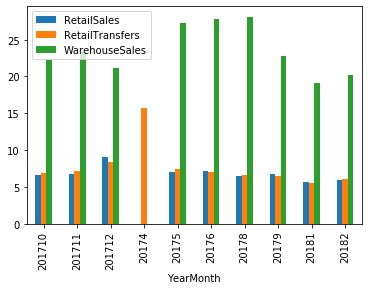

In [32]:
data.groupby('YearMonth')['RetailSales','RetailTransfers','WarehouseSales'].agg('mean').plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [39]:
pd.pivot_table(data,values='RetailSales',index=['YearMonth'],columns='ItemType')

ItemType,BEER,DUNNAGE,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
YearMonth,,,,,,,,
201710,12.817128,0.0,0.0,11.021571,13.509000,3.260000,6.490769,3.957538
201711,12.428722,0.0,0.0,11.774866,13.769726,9.015714,9.641818,4.211236
201712,16.065864,0.0,0.0,15.867440,18.033425,5.887143,31.402857,5.682273
20174,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
20175,14.455945,NaN,NaN,12.136614,NaN,NaN,NaN,3.913331
20176,15.831398,0.0,0.0,11.937073,17.031408,6.120000,7.435000,3.964298
20178,13.145051,0.0,0.0,11.090986,16.287761,3.908000,5.949231,3.689469
20179,14.181189,0.0,0.0,11.191029,13.848750,5.554286,7.886667,3.990899
20181,9.728371,0.0,0.0,9.485519,10.313380,3.380000,5.176364,3.678568


## 6. Plot the same information as above but as a bar chart.

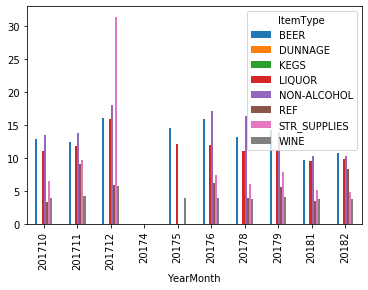

In [40]:
pd.pivot_table(data,values='RetailSales',index=['YearMonth'],columns='ItemType').plot.bar()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

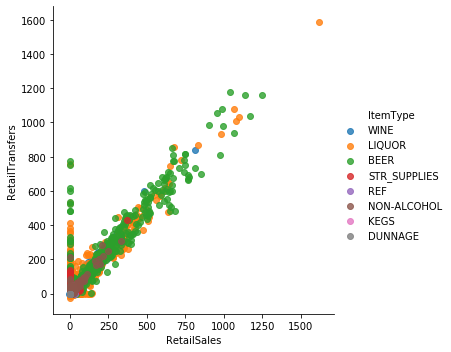

In [45]:
sns.lmplot(x="RetailSales", y="RetailTransfers", data=data, hue='ItemType',fit_reg=False)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

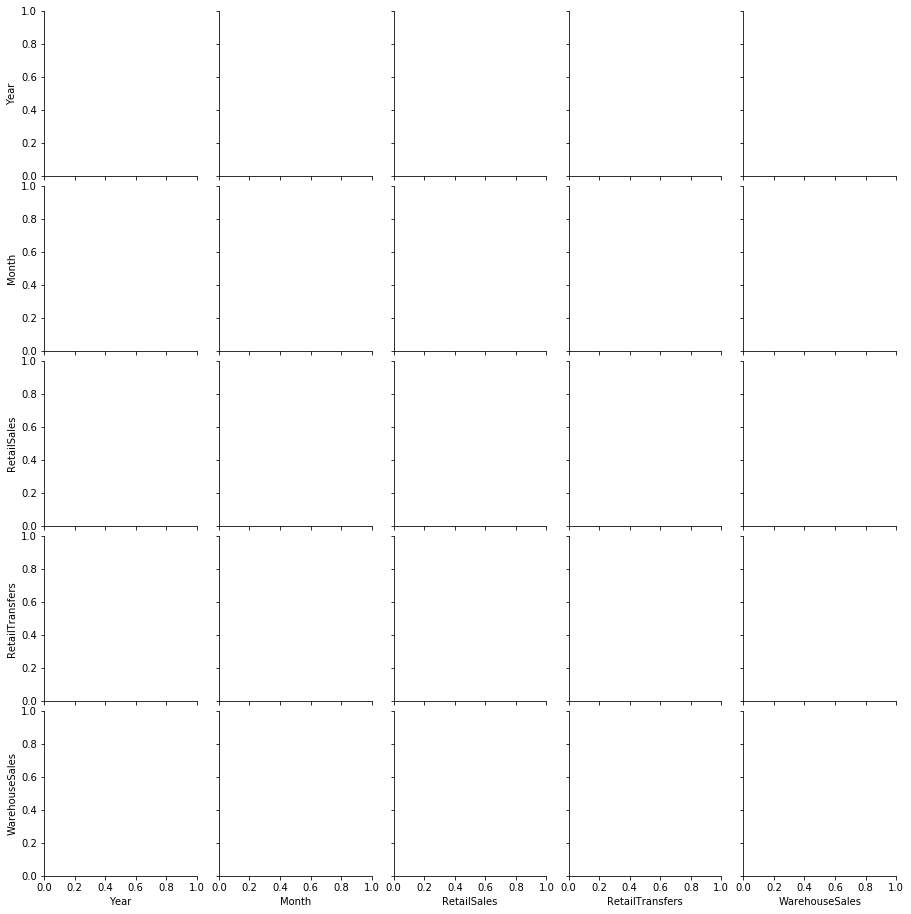

In [3]:
sns.pairplot(data,hue='ItemType')